In [63]:
import matplotlib.pyplot as plt
import numpy as np 

In [45]:
from coc_roll import simulate_multiple_shots

In [59]:
num_simulations = 100000
gun_max_damage=8
max_damage = num_shots * gun_max_damage

In [60]:
three_shots_res = {}
for skill_level in range(1, 100):
    damage_distribution = simulate_multiple_shots(
        skill_level=skill_level, 
        num_shots=3,
        gun_max_damage=gun_max_damage,
        num_simulations=num_simulations)
    three_shots_res[skill_level] = damage_distribution

In [57]:
single_shot_res = {}
for skill_level in range(1, 100):
    damage_distribution = simulate_multiple_shots(
        skill_level=skill_level, 
        num_shots=1,
        gun_max_damage=gun_max_damage,
        num_simulations=num_simulations)
    single_shot_res[skill_level] = damage_distribution

In [52]:
def plot_single_skill_level(data, skill_level):
    selected_skill_level = 25

    xvalues = []
    yvalues = []
    for dmg in range(max_damage + 1):
        xvalues.append(dmg)
        yvalues.append(data[skill_level].get(dmg, 0))

    px = 1/plt.rcParams['figure.dpi']

    fig, axes = plt.subplots(figsize=(1200*px, 600*px))

    plt.bar(xvalues, yvalues)

    plt.xlabel("Damage output")
    plt.ylabel("Frequency")
    plt.title(f"Damage output frequency distribution for skill level: {skill_level}")

    plt.show()

In [55]:
def plot_expected_values(data):
    x = []
    y = []
    for skill_level in range(1, 100):
        if not data.get(skill_level):
            continue
        x.append(skill_level)
        expected_value = sum([dmg * times for dmg, times in data[skill_level].items()]) / num_simulations
        y.append(expected_value)

    px = 1/plt.rcParams['figure.dpi']

    fig, axes = plt.subplots(figsize=(1200*px, 600*px))

    plt.bar(x, y)

    plt.xlabel("Skill level")
    plt.ylabel("Expected damage output")
    plt.title(f"Expected damage from {num_shots} shots for each skill level.")

    plt.show()

## 3 shots at skill level 25

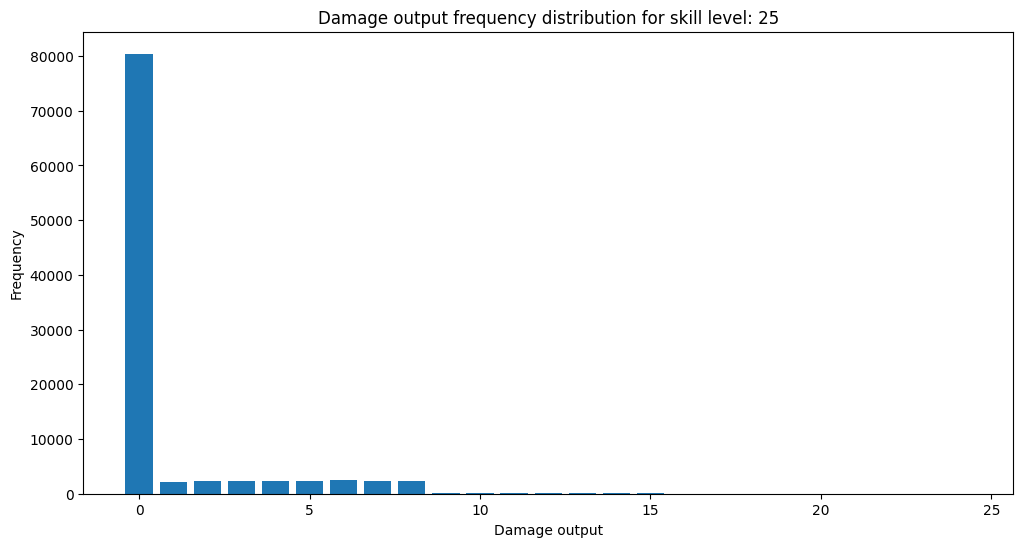

In [54]:
plot_single_skill_level(three_shots_res, 25)

## 1 shot at skill level 25

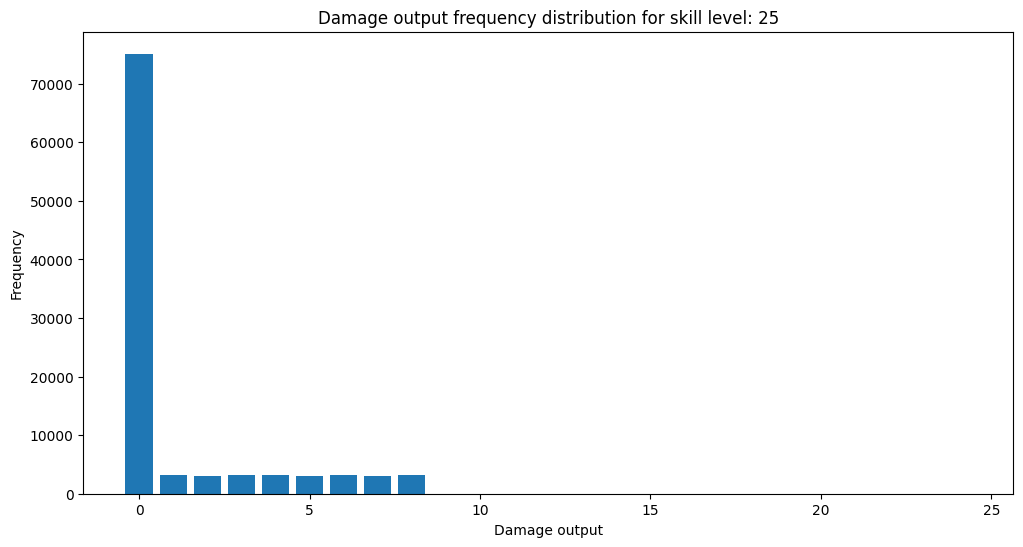

In [58]:
plot_single_skill_level(single_shot_res, 25)

## 3 shots expected damage at each skill level

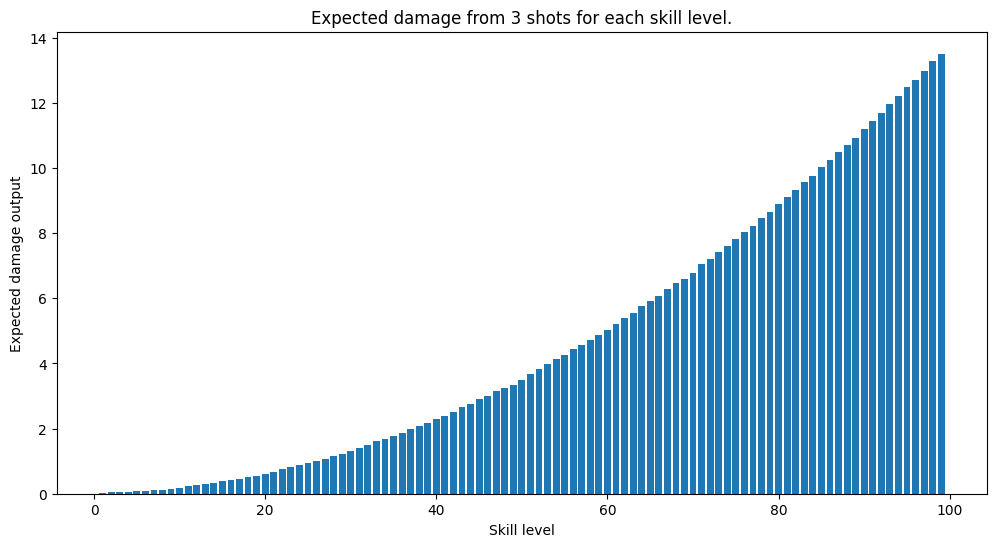

In [56]:
plot_expected_values(three_shots_res)

## 3 shots expected damage at each skill level

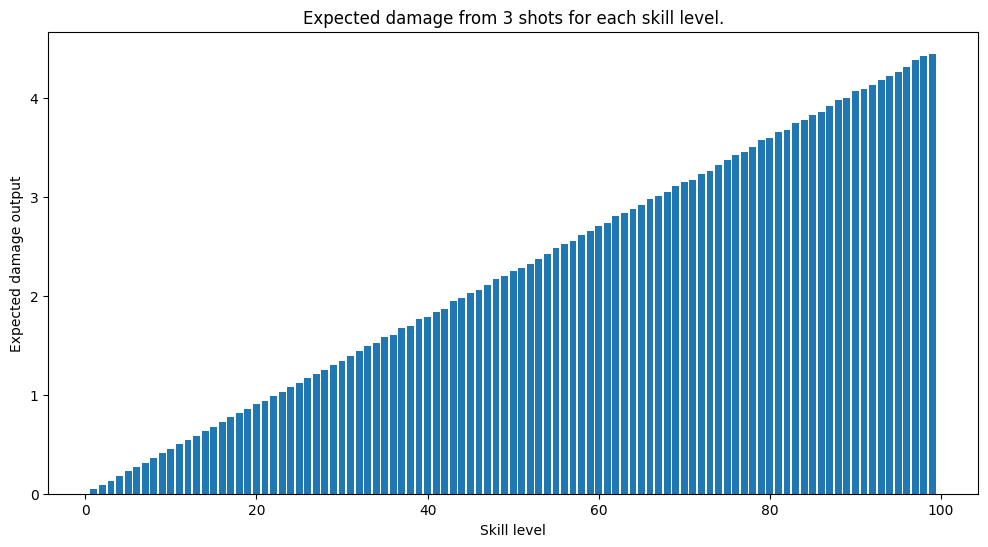

In [61]:
plot_expected_values(single_shot_res)

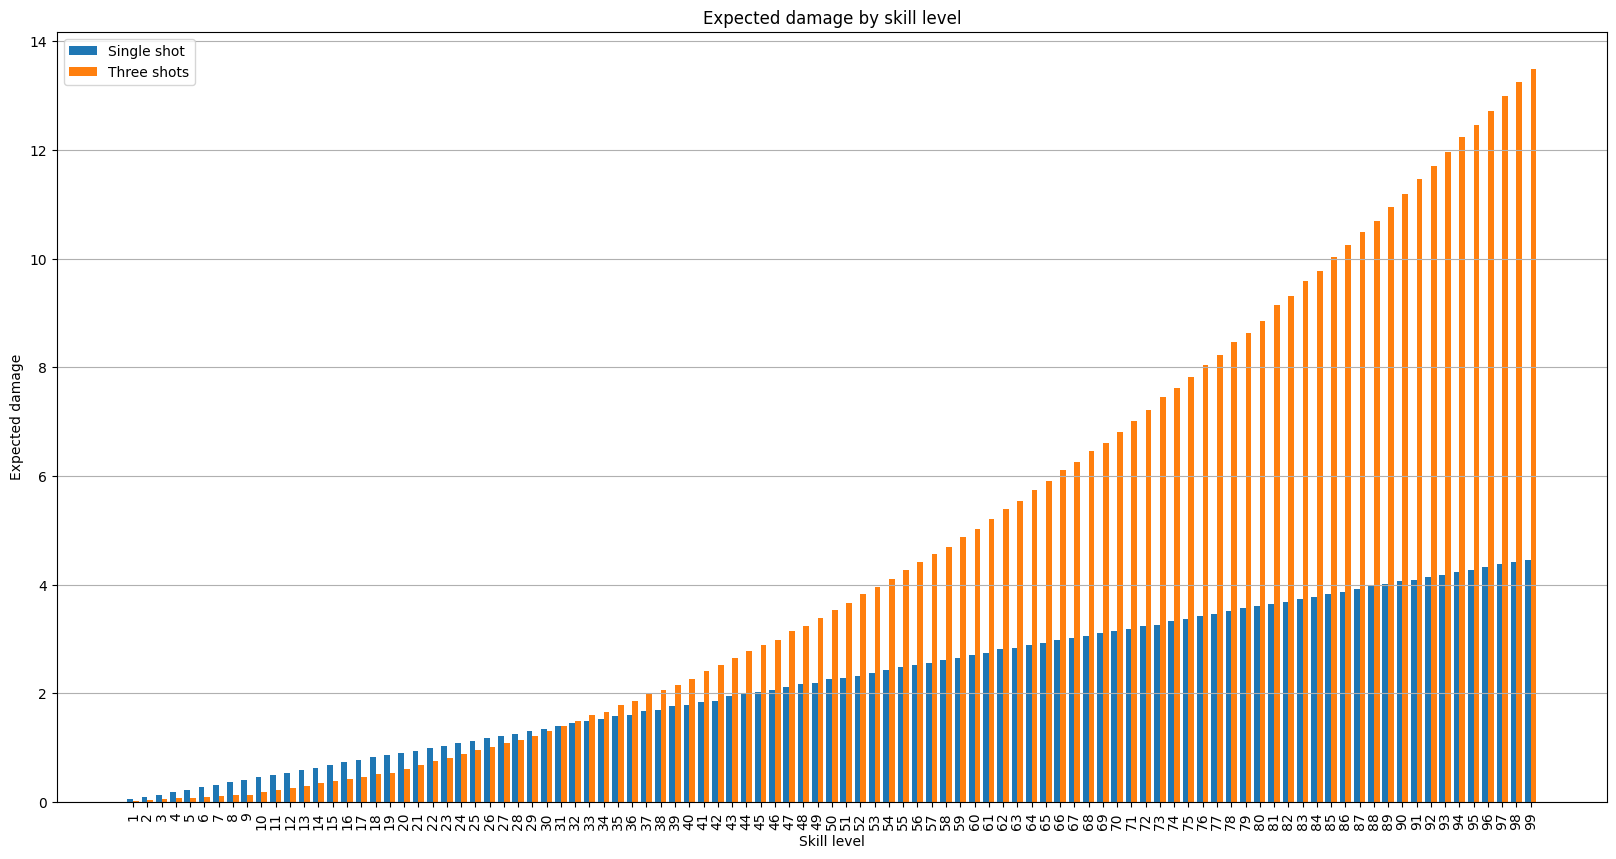

In [78]:
x = []
y_single = []
y_three = []
for skill_level in range(1, 100):
    x.append(skill_level)
    expected_value_single = sum([dmg * times for dmg, times in single_shot_res[skill_level].items()]) / num_simulations
    y_single.append(expected_value_single)
    expected_value_three = sum([dmg * times for dmg, times in three_shots_res[skill_level].items()]) / num_simulations
    y_three.append(expected_value_three)


x_axis = np.arange(len(x))
  
plt.bar(x_axis - 0.2, y_single, 0.4, label = 'Single shot')
plt.bar(x_axis + 0.2, y_three, 0.4, label = 'Three shots')
  
plt.xticks(x_axis, x, rotation=90)
plt.xlabel("Skill level")
plt.ylabel("Expected damage")
plt.title("Expected damage by skill level")
plt.legend()
plt.grid(axis='y')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()